<a href="https://colab.research.google.com/github/rohitsingh119cs/OCR/blob/master/Image_Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pytesseract==0.3.4
! pip install deskew==0.10.2
! apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
from pytesseract import Output
from deskew import determine_skew
from google.colab.patches import cv2_imshow
from typing import Tuple, Union
import pytesseract
import numpy as np
import cv2
import imutils


In [ ]:


# Tesseract Engine for Recognition
def tesseract(image, custom_config):
    data = pytesseract.image_to_data(image, output_type=Output.DICT, config=custom_config)
    return data

# Recognition function for Field Test Result
def heating_tess(image, image_name):
    if image is None:
        return "Error: Image Not available for Processing"
    else:
        # Custom Config for Field test result:
        custom_config = r' --psm 12 --oem 3 -c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890/'
        data = tesseract(image, custom_config)
        labeled_image = image
        for i in range(len(data['text'])):
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            labeled_image = cv2.rectangle(labeled_image, (x, y), (x + w, y + h), (0, 255, 0), 1)
            cv2.putText(labeled_image, data['text'][i], (x, y - 2), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.4, (0, 0, 255), 1)
        # store_image_local(labeled_image, image_name)
        output = data['text']
        return output


def rotate(image: np.ndarray, angle: float, background: Union[int, Tuple[int, int, int]]) -> np.ndarray:
    import math
    old_width, old_height = image.shape[:2]
    angle_radian = math.radians(angle)
    width = abs(np.sin(angle_radian) * old_height) + abs(np.cos(angle_radian) * old_width)
    height = abs(np.sin(angle_radian) * old_width) + abs(np.cos(angle_radian) * old_height)

    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    rot_mat[1, 2] += (width - old_width) / 2
    rot_mat[0, 2] += (height - old_height) / 2
    return cv2.warpAffine(image, rot_mat, (int(round(height)), int(round(width))), borderValue=background)



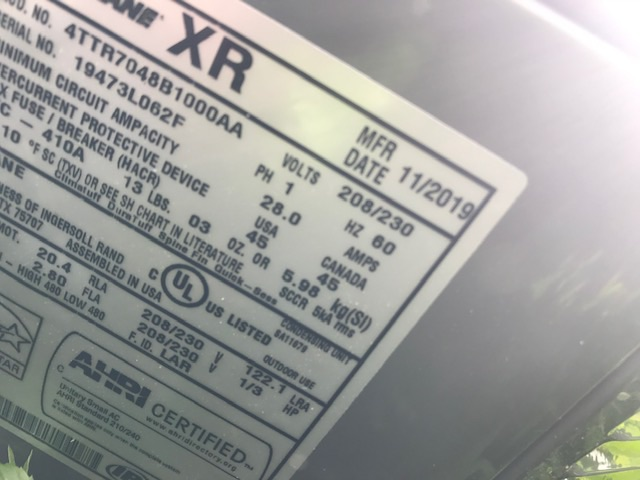

In [ ]:

# Load an color image in grayscale
img = cv2.imread('/content/1597809316855_OutdoorCoil.jpg')

# Show Original Image
cv2_imshow(img)

Text Angle Detected: 31.173184357541892


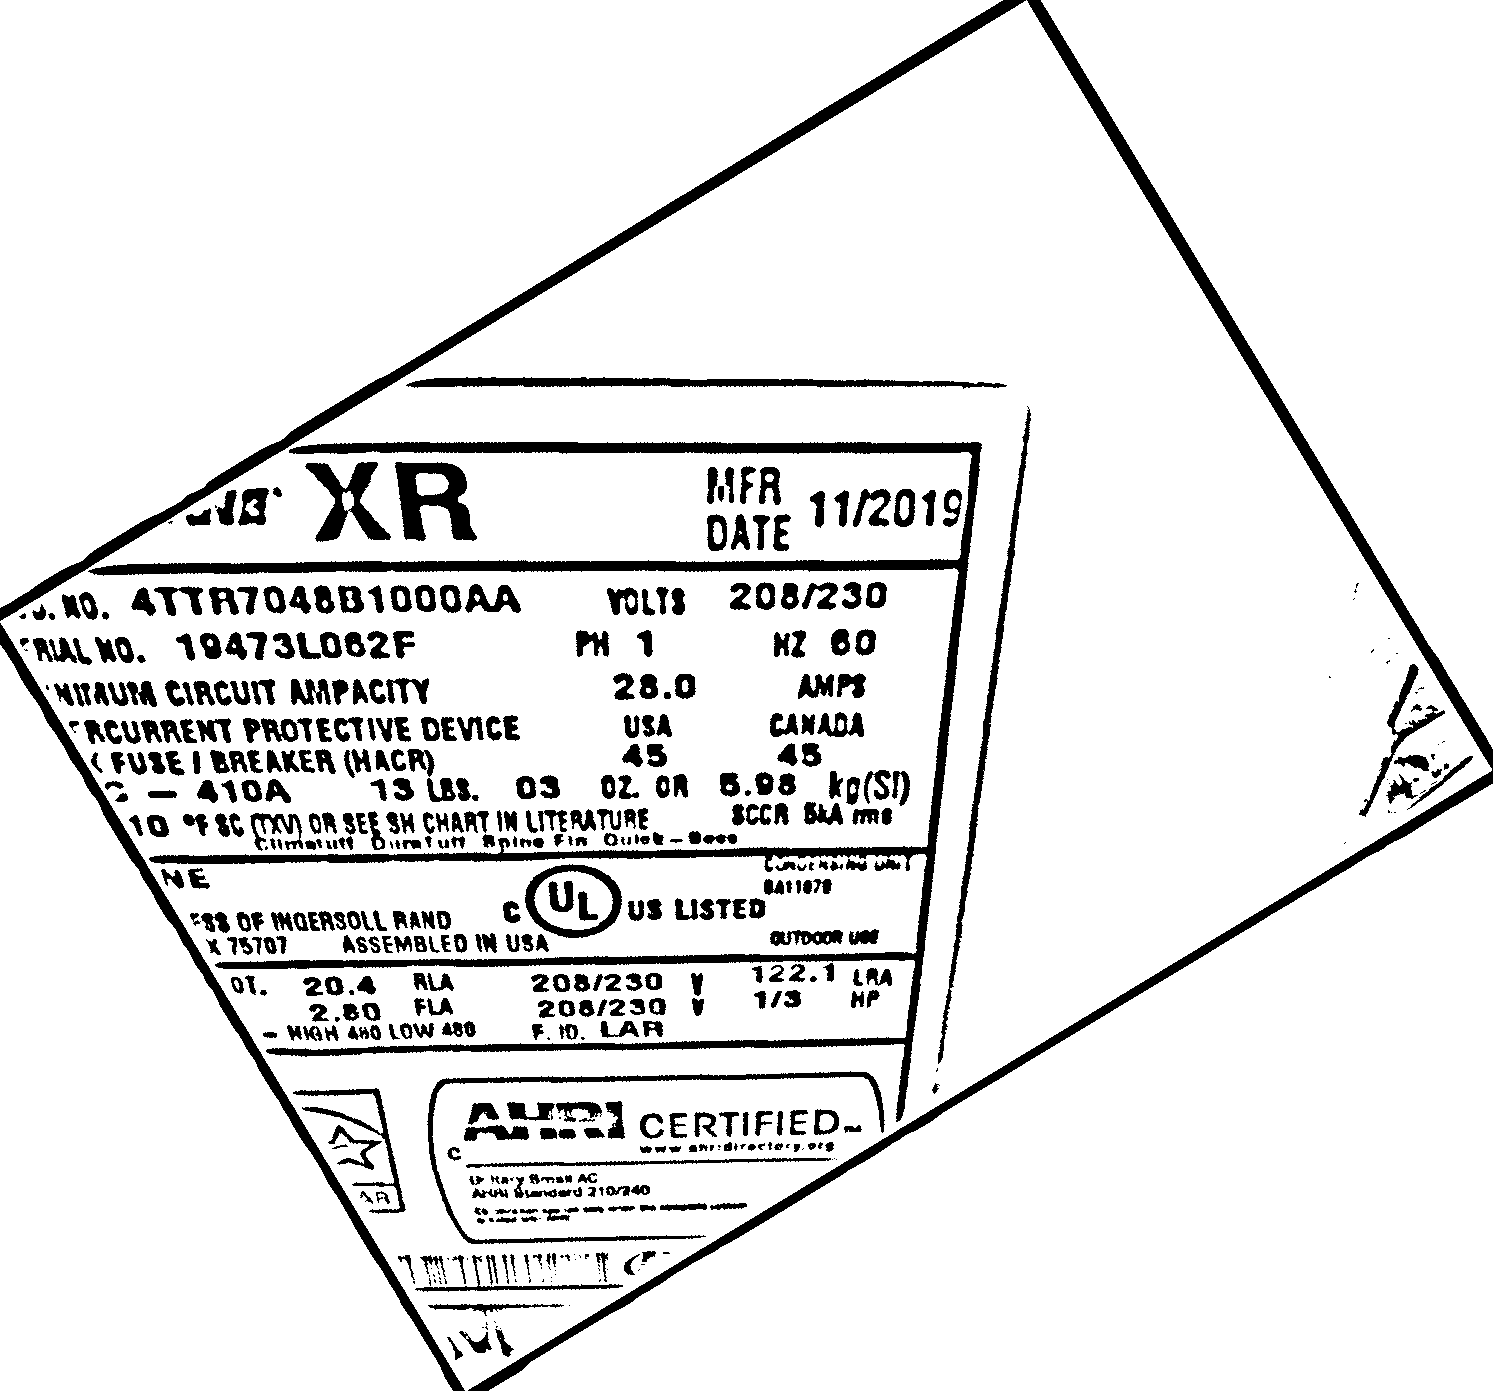

In [ ]:


# Resize image
resized_image = imutils.resize(img, height=900)
# gray color image
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
# Determine angle for skew
image_text_angle = determine_skew(gray_image)
print("Text Angle Detected:",image_text_angle)
# Rotate image from angle
rotated_image = rotate(gray_image, image_text_angle, (0, 0, 0))
threshold_image = cv2.threshold(rotated_image, 120, 255, cv2.THRESH_BINARY)[1]
adp_threshold = cv2.adaptiveThreshold(rotated_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 25, 12)

# Adaptive Threshold Output
cv2_imshow(adp_threshold)

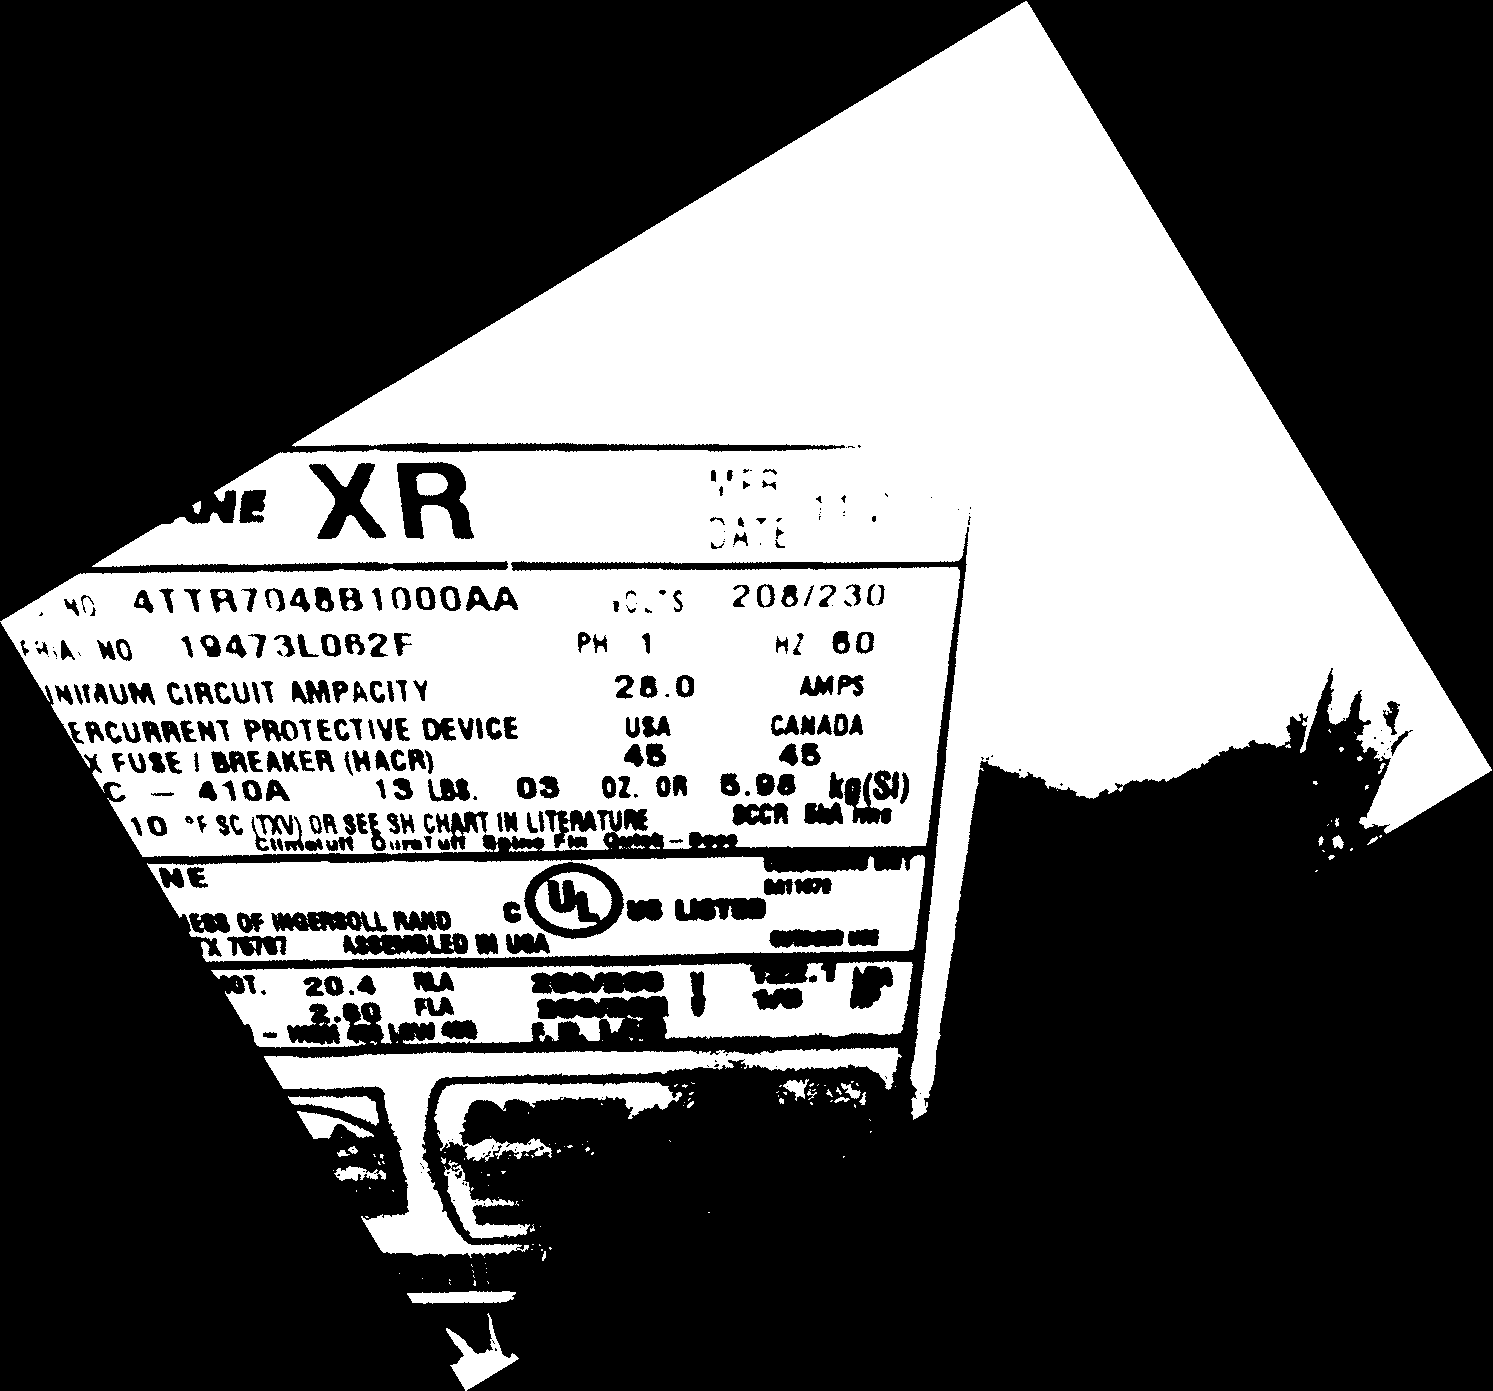

In [ ]:
# Normal Threshold Output
cv2_imshow(threshold_image)

In [ ]:
result_list = heating_tess(adp_threshold, "test.jpg")
print(result_list)

['', '', '', '', 'MFR', '', '', '', 'As', 'KR', '', '', '', 'DATE', '', '', '', '11/2019', '', '', '', 'Gs}', '', '', '', 'ATTRTO48B1000AA', '', '', '', 'yours', '208/230', '', '', '', 'SHALWO,', 'WOATILOGZE', '', '', '', 'mH', '1', '', '', '', 'nz', '60', '', '', '', 'WITAUTA', 'CIRCUIT', 'AMPACITY', '', '', '', '28.0', '', '', '', 'AMPS', '', '', '', 'F', 'RCURRENT', 'PROTECTIVE', 'DEVICE', '', '', '', 'USA', '', '', '', 'CANADA', '', '', '', '«', 'fuse', 'PT', 'BREAKER', '(HACR)', '', '', '', '48', '', '', '', '—', '410', '', '', '', '415', 'ss.', '03', '02', 'OR', '5.98', 'aft', '', '', '', '—Z', '', '', '', 'RSE', '', '', '', 'Fin', 'Quick', '—', '', '', '', 'RATURE', '', '', '', 'we', 'BUGR', 'SKA', '', '', '', 'Kv0', '“ERE', 'TAN', 'O', '', '', '', 'att', '', '', '', '§', 'SH', 'CHARTIN', '|', 'W', 'Ur', '', '', '', 'RUE', 'RRS', 'Ole', '', '', '', '‘i', 'E,', '', '', '', '1978', '', '', '', '“SS', 'OF', 'TROERSOLL', 'RAND', '', '', '', 'Go', '', '', '', 'US', 'LISTED', '', '', 